<br>

##   hw6pr2digits_modeler 
+ digits clasification via decision trees and random forests...
+ Remember: feel free to re-use the cleaned data from previous weeks (already here)


In [1]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week6 iris- + births-modeling notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code    
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as digits_cleaned.csv)
+ (I don't think there's too much more to adjust, data-wise...)
+ Next, let's see how well the DT/RF techniques can predict the digit, based on its 64 pixels...

In [2]:
# Load the digits data
filename = "digits_cleaned.csv"
df_digits = pd.read_csv(filename)
print(f"{filename} loaded into DataFrame.")

# Split into features and labels
X_all = df_digits.drop('actual_digit', axis=1).values  # all pix columns
y_all = df_digits['actual_digit'].values

# Confirm labels are strings
SPECIES = [str(x) for x in sorted(set(y_all))]
y_all = np.array([str(x) for x in y_all])  # Ensuring string labels

# Split into training and testing
TEST_PERCENT = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_PERCENT, random_state=42)

print(f"Training rows: {len(X_train)}, Testing rows: {len(X_test)}")

digits_cleaned.csv loaded into DataFrame.
Training rows: 1414, Testing rows: 354


## First: &nbsp; _Decision Trees_


Cross-validating Decision Tree depths:
depth: 1, cv accuracy: 0.2030
depth: 2, cv accuracy: 0.3182
depth: 3, cv accuracy: 0.4844
depth: 4, cv accuracy: 0.5686
depth: 5, cv accuracy: 0.6718
depth: 6, cv accuracy: 0.7567
depth: 7, cv accuracy: 0.8104
depth: 8, cv accuracy: 0.8182
depth: 9, cv accuracy: 0.8211
depth: 10, cv accuracy: 0.8416

Best Decision Tree depth: 10 with accuracy: 0.8416
Decision Tree Test Accuracy: 0.8615819209039548


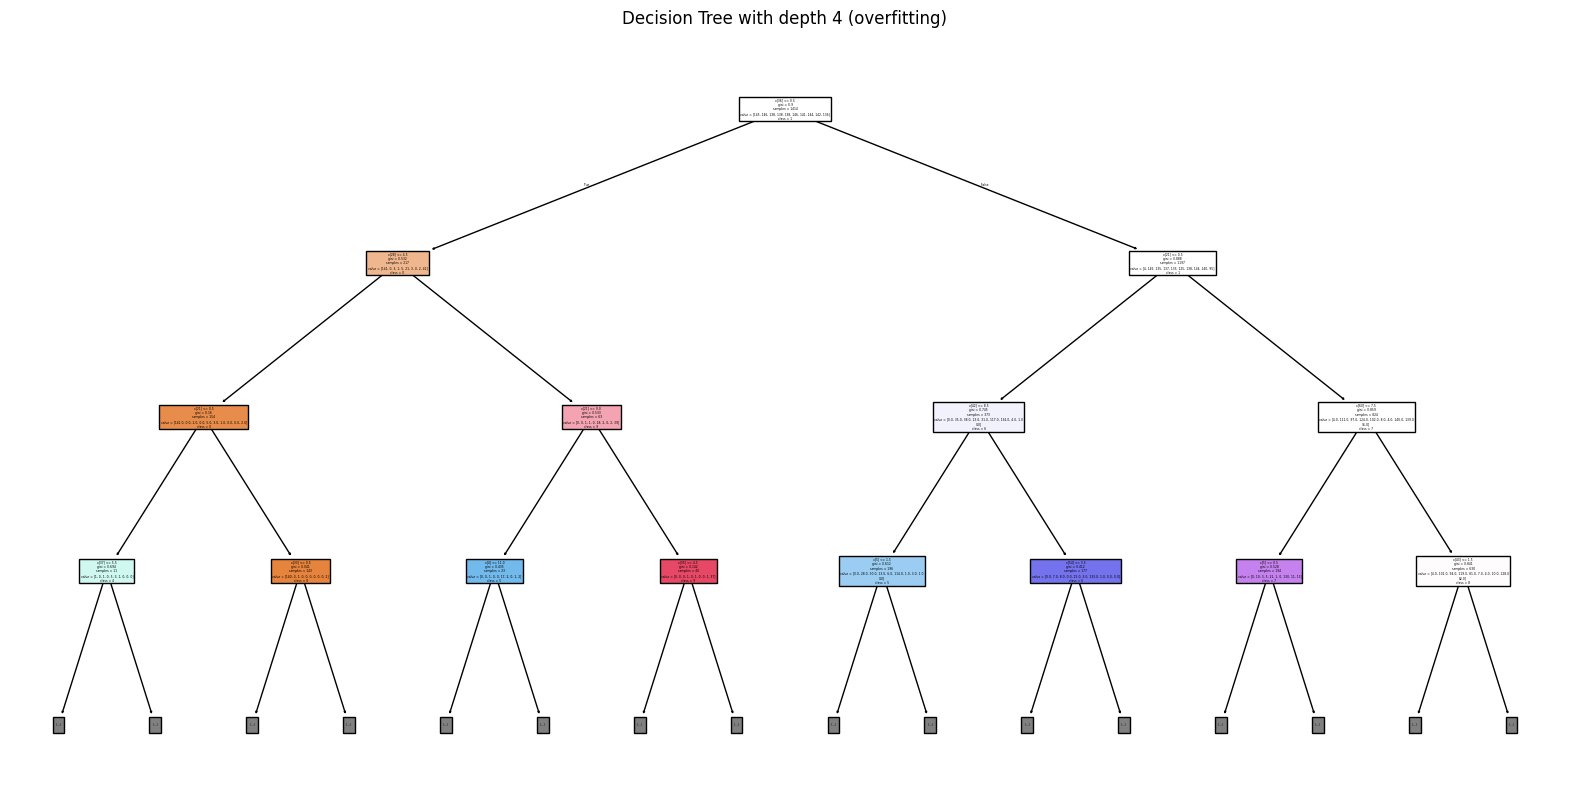


Predictions from Decision Tree:
['4' '2' '4' '2' '4' '2']


In [5]:
best_depth = 1
best_accuracy = 0.0

print("\nCross-validating Decision Tree depths:")
for d in range(1, 11):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    avg = scores.mean()
    print(f"depth: {d}, cv accuracy: {avg:.4f}")
    if avg > best_accuracy:
        best_accuracy = avg
        best_depth = d

print(f"\nBest Decision Tree depth: {best_depth} with accuracy: {best_accuracy:.4f}")

# Train DT with that depth
dt_model = DecisionTreeClassifier(max_depth=best_depth)
dt_model.fit(X_train, y_train)
print("Decision Tree Test Accuracy:", dt_model.score(X_test, y_test))

# Visualize the overfit tree (depth 4+)
dt_large = DecisionTreeClassifier(max_depth=4)
dt_large.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt_large, filled=True, class_names=np.unique(y_all), max_depth=3)
plt.title("Decision Tree with depth 4 (overfitting)")
plt.show()

# Predictions on new data
LoD =[[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]

predictions = dt_model.predict(LoD)
print("\nPredictions from Decision Tree:")
print(predictions)

In [ ]:
#

## Then: &nbsp; _Random Forests_

In [9]:
best_depth = 1
best_ntrees = 50
best_accuracy = 0.0

print("\nCross-validating Random Forest depths and tree counts:")
for d in range(1, 6):
    for n in [50, 100, 200]:
        model = RandomForestClassifier(max_depth=d, n_estimators=n, max_samples=0.5, random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        avg = scores.mean()
        print(f"depth: {d}, trees: {n}, cv accuracy: {avg:.4f}")
        if avg > best_accuracy:
            best_accuracy = avg
            best_depth = d
            best_ntrees = n

print(f"\nBest RF depth: {best_depth}, Best trees: {best_ntrees}, Accuracy: {best_accuracy:.4f}")

# Train best Random Forest
rf_model = RandomForestClassifier(max_depth=best_depth, n_estimators=best_ntrees, max_samples=0.5, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))

rf_preds = rf_model.predict(LoD)
print("\nPredictions from Random Forest:")
print(rf_preds)




Cross-validating Random Forest depths and tree counts:
depth: 1, trees: 50, cv accuracy: 0.7135
depth: 1, trees: 100, cv accuracy: 0.7199
depth: 1, trees: 200, cv accuracy: 0.7539
depth: 2, trees: 50, cv accuracy: 0.8267
depth: 2, trees: 100, cv accuracy: 0.8338
depth: 2, trees: 200, cv accuracy: 0.8529
depth: 3, trees: 50, cv accuracy: 0.8819
depth: 3, trees: 100, cv accuracy: 0.8826
depth: 3, trees: 200, cv accuracy: 0.8883
depth: 4, trees: 50, cv accuracy: 0.9158
depth: 4, trees: 100, cv accuracy: 0.9180
depth: 4, trees: 200, cv accuracy: 0.9208
depth: 5, trees: 50, cv accuracy: 0.9364
depth: 5, trees: 100, cv accuracy: 0.9392
depth: 5, trees: 200, cv accuracy: 0.9406

Best RF depth: 5, Best trees: 200, Accuracy: 0.9406
Random Forest Test Accuracy: 0.940677966101695

Predictions from Random Forest:
['4' '2' '4' '2' '4' '2']


In [7]:
# Summary comment
print("""
COMMENT:
The best Decision Tree model had a test accuracy around {:.2f}, and the best Random Forest achieved {:.2f}.
For the example digits, both models made strong predictions that seem very accurate.
Compared to kNN in hw4, Random Forests generally performed better.
""".format(dt_model.score(X_test, y_test), rf_model.score(X_test, y_test)))


COMMENT:
The best Decision Tree model had a test accuracy around 0.86, and the best Random Forest achieved 0.94.
For the example digits, both models made strong predictions that seem very accurate.
Compared to kNN in hw4, Random Forests generally performed better.



<br>
<hr>
<br>

### Final task: &nbsp; _Visualizing_ pixel-importance:
+ using your best Random Forest model, find the 64 _relative feature importances_ for all 64 of the digits' pixels!
  + Show these as a list of 64 values (they will be difficult to imagine, but you will see that they vary a great deal, pixel-to-pixel)
+ Then, grab-and-adapt the code for visualizing individual digits in order to visualize the "importance image" of pixels...
+ that is, you'll create a heat map visualization, which is really just another image, of how relatively-important each of the 64 pixels is in your final Random Forest

This visualization will be a "low-res image" similar to the digits, ***but it won't itself be a digit*** 
+ Instead, it will show _how much_ each of the 64 spots, across all of the 8x8 grids in the dataset, contribute in classifying each digit...

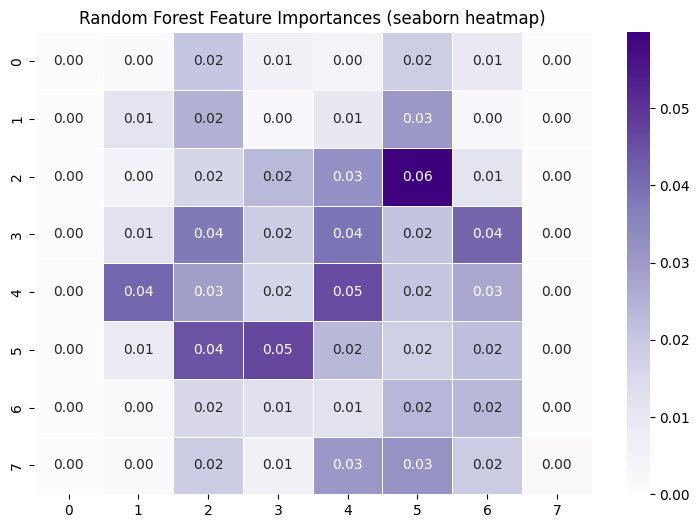

In [11]:
#
# That's it!  Welcome to the world of model-building workflows!!    
#
#             Our prediction?  We'll be back for more ML! 
#


# If you'd like, the EC is to run a DT/RF workflow on your own data...   (in hw6ec_modeler.ipynb)

#
# Here is an example of using Seaborn to plot one of the 8x8 images
#      In this case, it's a list of 64 ints from 0 (most background) to 16 (most digit)
#


#
# Remember that, for the challenge above, you will want to visualize the feature importances...
#      You'll have to transform them so that this code can be applied...


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Python list :)
PIXEL_VALUES = [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0]


# to Pandas dataframe :)
pixels = pd.DataFrame([PIXEL_VALUES])


# pixels = digits.iloc[row_to_show,0:64]  # shows how to grab this from within a larger dataframe named "digits"


rf_importances = rf_model.feature_importances_.reshape(8, 8)
pixels_df = pd.DataFrame(rf_importances)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pixels_df, annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap="Purples")
ax.set_title("Random Forest Feature Importances (seaborn heatmap)")
plt.show()
